# Transformada Quântica de Fourier

_Tutorial escrito por Fernando M de Paula Neto (fernando@cin.ufpe.br) para fins didáticos._

## Transformada de Fourier - Para quê?

Dado um vetor de $N$ números complexos, $[ x_0, x_1, ..., x_{N-1}]$,  você pode aplicar uma transformada de Fourier neste vetor. A saída da transformada é outro vetor $[y_0, y_1, ..., y_{N-1}]$ definido por


\begin{equation*}
y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}x_j e^{2 \pi i j k /N}. 
\tag{1}
\label{eq:transformada}
\end{equation*}

Mas daí você deve estar se perguntando... E para quê vou querer saber sobre a Transformada de Fourier? Pois bem, esta transformada é bastante usada em processamento de sinais em geral. Existem algumas tarefas descritas de forma mais simples no "mundo da frequência", ou "mundo de Fourier" do que no "mundo do tempo" ou "no mundo do espaço". A transformada, como o próprio nome diz, é a ponte que leva os dados no mundo do tempo para o mundo da frequência.

Isso se dá porque a transformada permite discriminar os componentes de frequência em um sinal (dados) distribuídos no tempo ou no espaço. Por exemplo, imagine que você precise eliminar o ruído de ar condicionado em uma gravação de voz ou retirar pequenas manchas de uma imagem. Isso tudo pode ser feito facilmente no mundo das frequências, porque o que você quer remover são sinais de alta frequência (sinal de ruído) e deixar os de baixa frequência (sinal de voz). Fazer isso usando a Transformada é rapidinho. E vou tentar convencer você aqui dando exemplos. [Veja o exemplo abaixo do resultado da retirada de ruído de uma imagem usando um filtro na frequência.](http://isaacvmorais.blogspot.com/2014/02/filtros-notch.html)


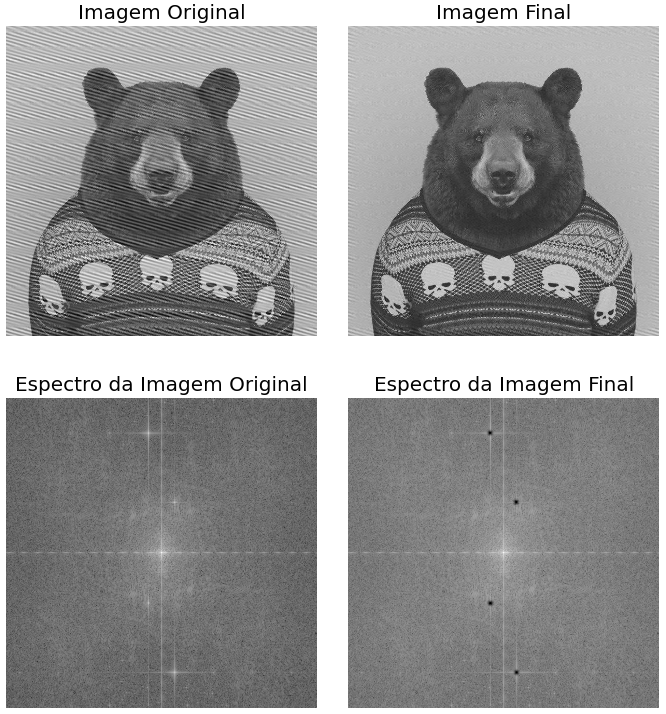

A função $\textbf{transformadaDiscretaFourier}$ implementa a transformada definida na Equação 1. 

A $\textbf{transformadaDiscretaFourierInversa}$ implementa a transformada inversa. A entrada para essas funções é um vetor $x$ de tamanho $N$. Eu não comentei, mas a função inversa da transformada é feita mudando o sinal do expoente da definição. Simples assim mesmo, acredite. Depois podemos discutir sobre isso mais à frente.

A função $\textbf{plotaSeriePlotaFourier}$ recebe como entrada um vetor $x$ de tamanho $N$ e plota a função do vetor $x$ e sua transformada.

A função $\textbf{plotaSerie}$ imprime apenas a função passada como argumento. Vai servir para a gente visualizar o formato da função antes de realizarmos alguns experimentos.

In [11]:
from cmath import sqrt, pi, exp, sin
import numpy as np
import matplotlib.pyplot as plt

def transformadaDiscretaFourier(x, N):
    y = []
    for k in range(N):
        sumExp = 0
        for j in range(N):
            sumExp += x[j] * exp(complex(0,2*pi*j*k/N))
        yk = (1/sqrt(N)) * sumExp
        y.append(yk)
    return y

def transformadaDiscretaFourierInversa(x, N):
    y = []
    for k in range(N):
        sumExp = 0
        for j in range(N):
            sumExp += x[j] * exp(complex(0,-2*pi*j*k/N))
        yk = (1/sqrt(N)) * sumExp
        y.append(yk)
    return y


def plotaSeriePlotaFourier(x,N, labelFunc):
    
    y= transformadaDiscretaFourier(x, len(x))
    #for yk in y:
    #    print(round(yk.real, 2) + round(yk.imag, 2) * 1j)

    
    fig, axs = plt.subplots(2, 1)
    axs[0].plot([i for i in range(len(x))],x , label=labelFunc)
    
    axs[1].scatter([i for i in range(len(y))], [abs(yk) for yk in y] , label=labelFunc)

    fig.tight_layout()
    plt.show()

def plotaSerie(x,N, labelFunc):
    
    fig, axs = plt.subplots(1, 1)
    axs.plot([i for i in range(len(x))],x , label=labelFunc)

    fig.tight_layout()
    plt.show()



Considere que temos um sinal constante. Ou seja, para qualquer valor no tempo, ele é sempre um valor. Vamos ver a aplicação da transformada de Fourier para este sinal.

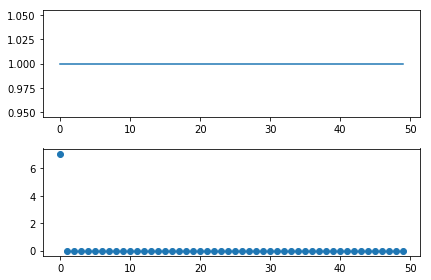

In [12]:
#funcao constante
x = [1 for t in range(50)]
plotaSeriePlotaFourier (x, len(x), "funcao constante")


Perceba que há apenas um valor diferente de zero na transformada exatamente na posição 0. Na linguagem de processamento de sinais dizemos que a função tem uma componente na frequência zero, pois é um sinal DC.


Agora, vamos aplicar na transformada um vetor $x$ que terá os valores de uma função $sen(2.\pi.t/50)$.

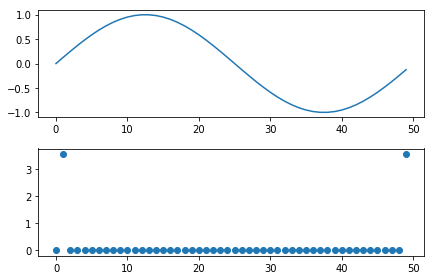

In [13]:
#funcao sen(2.pi.t/50)
x = [sin(2*pi*t/50) for t in range(50)]

plotaSeriePlotaFourier (x, len(x), "funcao seno")

É possível ver que, no gráfico da transformada, há componente de frequência diferente de zero na posição 1. Isso indica que o sinal de entrada possui apenas um componente de frequência. Veja que na posição 49 possui, a transformada tem valor diferente de zero também, mas este é um espelho do ponto de coordenada 1. Veremos mais exemplos à frente.

Mais abaixo, uma função seno de frequência duplicada é criada e no gráfico da transformada podemos ver componentes de frequência na transformada de Fourier que está na posição 2.

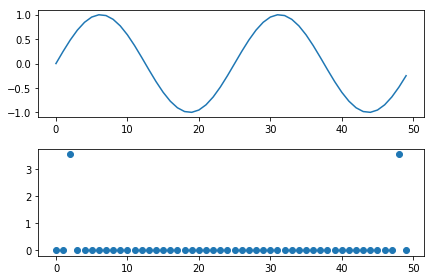

In [14]:
#funcao sen(2.2.pi.t/50)
x = [sin(2*2*pi*t/50) for t in range(50)]

plotaSeriePlotaFourier (x, len(x), "funcao seno")

E o que acontece se somamos duas senóides com frequências diferentes? 

\begin{equation}
sen(2.pi.t/500) + sen(2.2.pi.t/500)
\end{equation}

Na transformada, como esperado, veremos os dois componentes de frequência está presente, nas posições 1 e 2, que representam as duas senoides existentes. Perceba que identificar que neste sinal no domínio do tempo há duas frequências é uma tarefa muito difícil. Você tem esta habilidade?

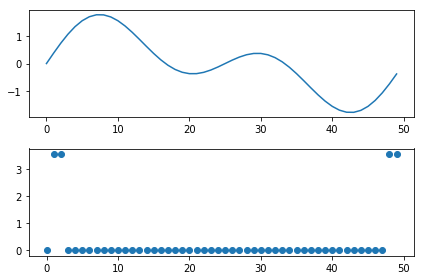

In [15]:
#funcao sen(2.pi.t/50) + sen(2*2.pi.t/50)
x = [sin(2*pi*t/50)+sin(2*2*pi*t/50) for t in range(50)]
plotaSeriePlotaFourier (x, len(x), "funcao seno")

Se aumentarmos a frequência do sinal a ser somado, perceba que o componente na frequência que representa o sinal somado está mais distante do sinal de componente de baixa frequência (bem esperado, porque a posição na coordenada no gráfico da transformada indica quais os valores das frequências do sinal).

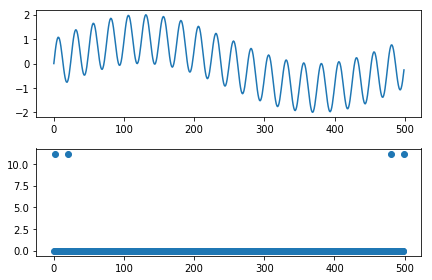

In [16]:

#funcao sen(20.2.pi.t/50) + sen(2.pi.t/50)
x = [sin(20*2*pi*t/500)+sin(2*pi*t/500) for t in range(500)]

plotaSeriePlotaFourier (x, len(x), "funcao seno")

Você pode estar intuindo a aplicação mais básica da transformada de Fourier.

Sim, podemos levar o sinal para o domínio da frequência, eliminar os componentes de alta frequência e em seguida restaurar o sinal para o domínio no tempo. E então teremos apenas o sinal de baixa frequência!

Para isso, vamos criar um filtro passa baixa, para deixar passar apenas os componentes de baixa frequência. Em seguida, utilizaremos a função da transformada inversa para retornar ao mundo do tempo.

In [17]:
def filtroPassaBaixa(x,N, labelFunc, freq):
    y= transformadaDiscretaFourier(x,N)
    yLinha=y[::] #copia
    #filtro
    for i in range(len(y)):
        if(i>freq and i < len(y)-freq):
            yLinha[i]=0
    
    xLinha = transformadaDiscretaFourierInversa(yLinha, len(yLinha))

    fig, axs = plt.subplots(4, 1)
    axs[0].plot([i for i in range(len(x))],x , label=labelFunc)
    axs[1].scatter([i for i in range(len(y))], [abs(yk) for yk in y] , label=labelFunc)
    axs[2].scatter([i for i in range(len(yLinha))], [abs(yk) for yk in yLinha] , label=labelFunc)
    axs[3].plot([i for i in range(len(xLinha))],xLinha , label=labelFunc)

    fig.tight_layout()
    plt.show()

Considere que nosso sinal de interesse é um sen(2.pi.t/500).

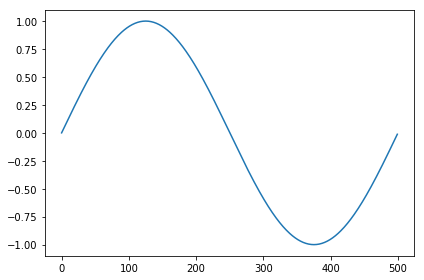

In [18]:
#funcao sen(2.pi.t/500)
x = [sin(2*pi*t/500) for t in range(500)]
plotaSerie(x, len(x), "sin")

Porém, ele foi corrompido por um ruído de uma frequência mais alta sin(20.2.pi.t/500), um ruído. Originado, talvez, por conta do canal de transmissão por um ar condicionado ligado durante a sua gravação.

Podemos eliminar esse ruído no sinal aplicando o filtro.

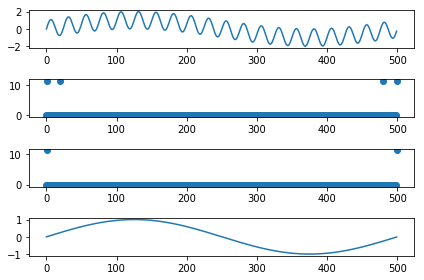

In [19]:
#funcao sen(20.2.pi.t/50) + sen(2.pi.t/50)
x = [sin(20*2*pi*t/500)+sin(2*pi*t/500) for t in range(500)]

filtroPassaBaixa(x, len(x), "passa baixa",1)

Perceba que se esse ruído tiver um componente de frequência ainda mais alto, fica mais distante da frequência de interesse e fica mais seguro a sua remoção. 

Podemos ver o exemplo abaixo o caso em que o ruído não só tem frequência mais alta, como tem baixa amplitude. É o que costume acontecer: o sinal de interesse tem amplitude maior e o sinal de ruído tem amplitude menor. 

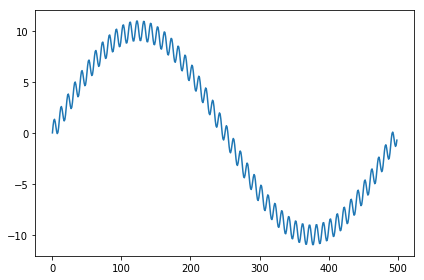

In [20]:
#funcao sen(2.pi.t/50) + sen(1000*2.pi.t/50)
x = [10*sin(2*pi*t/500)+sin(50*2*pi*t/500) for t in range(500)]
plotaSerie(x, len(x), "sin")

O sinal pode ser recuperado facilmente eliminando as componentes de alta frequência:

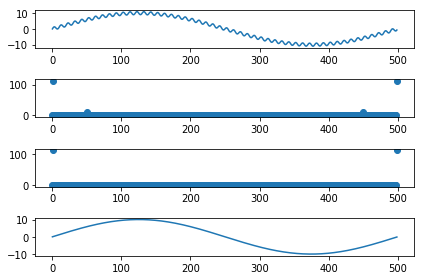

In [21]:
#funcao sen(20.2.pi.t/50) + sen(2.pi.t/50)
x = [10*sin(2*pi*t/500)+sin(50*2*pi*t/500) for t in range(500)]

filtroPassaBaixa(x, len(x), "passa baixa",20)

Em resumo, a transformada leva uma determinada função no domínio tempo/espaço para o domínio de componentes de frequência. Isso permite manipular a mesma informação representada de outra forma.

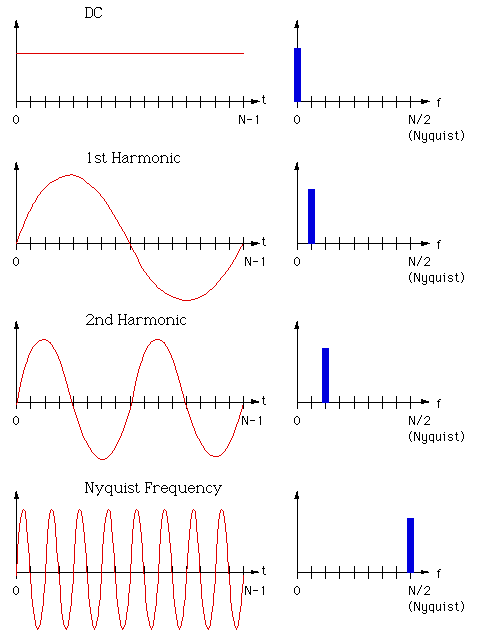

## Retornando ao mundo quântico

Agora que sabemos [mais ou menos :-) ] para quê serve a transformada de Fourier, podemos pensar um pouco melhor sobre a transformada na computação quântica.

Recapitulando a definição da transformada no mundo clássico:

Dado um vetor de $N$ números complexos, $x_0, x_1, ..., x_{N-1}$, como entrada. 

A saída do algoritmo é outro vetor $y_0, y_1, ..., y_{N-1}$ definido por

\begin{equation}
y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}x_j e^{2 \pi i j k /N}.
\end{equation}

A definição da transformada na computação é: a transformada quântica recebe como entrada um estado quântico $|\textbf{j}>$. Se este estado tiver N qubits, nós sabemos que ele pode ser um estado da base |0> , |1> , |2> , ... , |N-1>, ou a superposição desses estados da base. 

A definição da transformada quântica para um estado da base computacional é:

\begin{equation}
|j> \underrightarrow{QFT} \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2 \pi i j k/n}|k>
\end{equation}

### Exemplo

Vamos ver exemplos antes de prosseguir.
Se temos n=3 qubits, e a entrada é |000>, qual o resultado da transformada?

\begin{equation}
|000> =  \underrightarrow{QFT}
 \frac{1}{\sqrt{8}} (e^{2 \pi i 0.0/8}|000> + e^{2 \pi i 0.1/8}|001> + e^{2 \pi i 0.2/8}|010> + e^{2 \pi i 0.3/8}|011> + e^{2 \pi i 0.4/8}|100> + e^{2 \pi i 0.5/8}|101> + e^{2 \pi i 0.6/8}|110> + e^{2 \pi i 0.7/8}|111>) = \frac{1}{\sqrt{N}} (|000> + |001> + |010> + e^{2 \pi i 0.3/8}|011> + |100> + |101> + |110> + |111>)
 \tag{2}
 \end{equation}

E se a entrada é |011>, qual o resultado da transformada?

\begin{equation}
|011> =  \underrightarrow{QFT}
 \frac{1}{\sqrt{8}} (e^{2 \pi i 3.0/8}|000> + e^{2 \pi i 3.1/8}|001> + e^{2 \pi i 3.2/8}|010> + e^{2 \pi i 3.3/8}|011> + e^{2 \pi i 3.4/8}|100> + e^{2 \pi i 3.5/8}|101> + e^{2 \pi i 3.6/8}|110> + e^{2 \pi i 3.7/8}|111>)
 \tag{3}
 \end{equation}



Para um estado |j> em superposição, a transformada age para cada um dos estados separadamente:

\begin{equation}
\sum_{j=0}^{N-1} x_j |j> \rightarrow \sum_{k=0}^{N-1} y_k|k>
\tag{4}
\end{equation}

ou então

\begin{equation}
\sum_{j=0}^{N-1} x_j |j> \underrightarrow{QFT} \sum_{k=0}^{N-1} (\frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}x_j e^{2 \pi i j k /N})|k>
\tag{5}
\end{equation}

In [22]:
### em breve, vou colocar um exemplo.

Vamos considerar a seguinte notação antes de prosseguir. Para representar $j$ que é um valor decimal em uma cadeia binária $j = j_1 j_2 \cdots j_n$ de $n$ bits, podemos usar a transformação usual entre decimal e binário:

\begin{equation}
j = \sum_{k=1}^{n} j_k 2^{n-k} = j_1 2^{n-1} + j_2 2^{n-2} + \cdots + j_n 2^{0}.
\tag{6}
\end{equation}

Por exemplo, para $j=21$, a cadeia binária correspondente é $10101$
\begin{equation}
j_1 = 1, j_2=0, j_3=1, j_4=0, j_5=1
\tag{7}
\end{equation}

em binário, pois $j = 21 = 1.2^{4} + 0.2^{3} + 1.2^{2} + 0.2^{1} + 1.2^{0}$.

Também podemos usar a notação $0.j_l j_{l+1} \cdots  j_{m}$ para representar a fração binária $j_{l}/2 + j_{l+1}/4 + \cdots + j_{m}/2^{m-l+1}$. Por exemplo, $0.0111$ é igual a $j_{1}=0, j_{2}=1, j_{3}=0, j_{4}=1$, que vai ser em fração binária $0/2 + 1/4 + 1/8 + 1/16 = 1/4 + 1/8 + 1/16 = 7/16 = 0.4375$



Essas definições acima são interessantes porque a transformada de Fourier quântica também pode ser representada na "representação de produto":

\begin{equation}
|j_1 \cdots j_n> \underrightarrow{QFT}\frac{(|0> + e^{2 \pi i 0.j_{n}}) (|0> + e^{2 \pi i 0.j_{n-1}j_{n}}) \cdots (|0> + e^{2 \pi i 0.j_{1}j_{2} \cdots j_{n}})}{2^{n/2}}
\tag{8}
\end{equation}

Se considerarmos que $|j_1 \cdots j_n> = |j>$, então

\begin{equation}
 |j_1 \cdots j_n> = |j> \underrightarrow{QFT} \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2 \pi i j k/n}|k>  = \frac{(|0> + e^{2 \pi i 0.j_{n}}|1>) (|0> + e^{2 \pi i 0.j_{n-1}j_{n}}|1>) \cdots (|0> + e^{2 \pi i 0.j_{1}j_{2} \cdots j_{n}}|1>)}{2^{n/2}}
 \tag{9}
\end{equation}

Você pode olhar Nielsen & Chuang para ver a demonstração dessa equivalência (não é difícil).

### Exemplos

#### Exemplo 1 

Vamos dar um exemplo antes de prosseguir.
Se temos n=3 qubits, e a entrada é |000>, qual o resultado da transformada?

\begin{equation}
|000> = |j_1=0, j_2=0, j_3=0>  \underrightarrow{QFT}
 \frac{(|0> + e^{2 \pi i 0.0}|1>) (|0> + e^{2 \pi i 0.00}|1>) (|0> + e^{2 \pi i 0.000}|1>)}{2^{3/2}} 
 \end{equation}

Como 0.0 = 0.00= 0.000= 0, então:

\begin{equation}
|000> = |j_1=0, j_2=0, j_3=0>   \underrightarrow{QFT} \frac{(|0> + e^{0}) (|0> + e^{0}) (|0> + e^{0})}{2^{3/2}}  = \frac{(|0> + |1>) (|0> + |1>) (|0> + |1>)}{2^{3/2}} = \frac{|000>+|001>+|010>+|011>+|100>+|101>+|110>+111>}{\sqrt{8}}
\end{equation}

Como esperado. Vimos esse exemplo acima executado pela definição habitual.

#### Exemplo 2

Para outra entrada, |001>, qual o resultado da transformada?


\begin{equation}
|001> = |j_1=0, j_2=0, j_3=1>   \underrightarrow{QFT} \frac{(|0> + e^{2 \pi i 0.1}|1>) (|0> + e^{2 \pi i 0.01}|1>) (|0> + e^{2 \pi i 0.001}|1>)}{2^{3/2}} 
\end{equation}

Como 0.1 = 1/2 , 0.01 = 0/2 + 1/4 = 1/4  e 0.001 = 0/2 + 0/4 + 1/8 = 1/8, então:

\begin{equation}
|001> = |j_1=0, j_2=0, j_3=1>   \underrightarrow{QFT} \frac{(|0> + e^{2 \pi i . 1/2}|1>) (|0> + e^{2 \pi i . 1/4}|1>) (|0> + e^{2 \pi i . 1/8}|1>)}{2^{3/2}} = \frac{1}{\sqrt{8}} (|000> + e^{2 \pi i . 1/8}|001> + e^{2 \pi i . 2/8}|010> + e^{2 \pi i . 3/8}|011> + e^{2 \pi i . 4/8}|100>+ e^{2 \pi i . 5/8}|101>+ e^{2 \pi i . 6/8}|110>+ e^{2 \pi i . 7/8}|111> )
\end{equation}

#### Exemplo 3

Para outra entrada, |010>, qual o resultado da transformada?


\begin{equation}
|010> = |j_1=0, j_2=1, j_3=0>   \underrightarrow{QFT} \frac{(|0> + e^{2 \pi i 0.0}|1>) (|0> + e^{2 \pi i 0.10}|1>) (|0> + e^{2 \pi i 0.010}|1>)}{2^{3/2}}
\end{equation}

Como 0.0 = 0 , 0.10 = 1/2 + 0/4 = 1/2  e 0.010 = 0/2 + 1/4 + 0/8 = 1/4, então:

\begin{equation}
|010> = |j_1=0, j_2=1, j_3=0>   \underrightarrow{QFT} \frac{(|0> + e^{2 \pi i . 0}|1>) (|0> + e^{2 \pi i . 1/2}|1>) (|0> + e^{2 \pi i . 1/4}|1>)}{2^{3/2}} 
= \frac{1}{\sqrt{8}} (|000> + e^{2 \pi i . 1/4}|001> + e^{2 \pi i . 1/2}|010> + e^{2 \pi i . 3/4}|011> + e^{2 \pi i . 0}|100>+ e^{2 \pi i . 1/4}|101>+ e^{2 \pi i . 1/2}|110>+ e^{2 \pi i . 3/4}|111> )
\end{equation}

Neste momento, pode ser bom você lembrar das equivalências dos números complexos.
Lembra que se você pegar um número complexo, com valores r e theta, e rotacionar theta somando-o com 2pi, o ângulo vai ser o mesmo.

Por exemplo, para r=1, theta=pi/2, esse número é $e^{i . \pi/2}$ que é igual a $e^{i . (\pi/2 + 2 \pi)} = e^{i . (5\pi/2)}$


### Quando a entrada é uma superposição de estados da base

Quando a entrada é uma superposição de estados da base, $x_0 |0> + x_1|1> +\cdots+ x_{N-1} |N-1> $, o algoritmo calcula a transformada para as amplitudes dos estados da base deste vetor $(x_0, x_1, \cdots, x_{N-1})$. 

Após a aplicação da transformada, a amplitude de cada estado da base de saída é o valor da transformada em cada frequência: $y_0 |0> + y_1 |1> + \cdots + y_{N-1} |N-1>$, onde 

$y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}x_j e^{2 \pi i j k /N}$, como comentamos anteriormente. Cada valor de amplitude do estado de saída, $y_k$, terá o valor da transformada para uma determinada posição $k$ no domínio da frequência.

## Circuito quântico da transformada

A partir da equivalência entre a definição e a representação de produto, o circuito para gerar a transformada quântica de Fourier é possível utilizando CNOTs e uma porta de Rotação Rk, definida como:

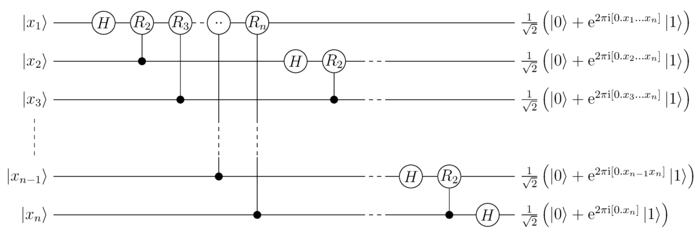

onde 
\begin{equation}
Rx= \begin{bmatrix} 
0 & 1 \\
0 & e^{2 \pi i /2^{k}} 
\end{bmatrix}
\end{equation}

No Qiskit, podemos criar as duas funções para a transformada e a inversa da transformada:

In [23]:
from qiskit import QuantumCircuit
from qiskit import ClassicalRegister
from qiskit import QuantumRegister
from qiskit import execute, Aer


from qiskit import BasicAer, execute
from qiskit.tools.visualization import *
from qiskit import IBMQ
from qiskit.qasm import pi
import numpy as np
import math

from qiskit.tools.visualization import plot_histogram, circuit_drawer

def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        circ.h(q[j])
        for k in range(j+1,n):
            circ.cu1(math.pi/float(2**(k-j)), q[k], q[j])
            
def qft_dagger(circ, q, n):
    """n-qubit QFTdagger on q in circ."""
    for j in range(n):
        k = (n-1) - j
        for m in range(k):
            circ.cu1(-math.pi/float(2**(k-m)), q[k], q[m])
        circ.h(q[k])

/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:548: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


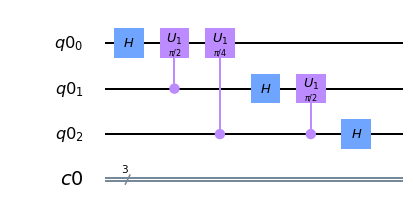

In [24]:
IBMQ.backends()

backendSimulador = BasicAer.get_backend('qasm_simulator')

num_of_qubits = 3
qbits = QuantumRegister(num_of_qubits)
cbits = ClassicalRegister(num_of_qubits)
circuit = QuantumCircuit(qbits, cbits)

qft(circuit, qbits, num_of_qubits)
#qft_dagger(circuit, qbits, num_of_qubits)

#circuit_drawer(circuit)
circuit.draw(output="mpl")


## Estimativa de fase

Vamos ver uma das aplicações da transformada quântica de Fourier em problemas da computação quântica.

O exemplo clássico nos livros é na estimativa de fase. Por exemplo, imagine que para uma determinada entrada |u> em um operador quântico $U$, a saída seja $U|u> = e^{2 \pi \varphi} |u>$. Em termos algébricos isso quer dizer que $e^{2 \pi \varphi}$ é o autovalor do autovetor |u> do operador U.

Considere como exemplo o operador 
\begin{equation}
 Z= \begin{bmatrix} 
0 & 1 \\
0 & -1 
\end{bmatrix}
\end{equation}

Perceba que Z|0> = 1|0> e Z|1> = -1 |1>.
Isso quer dizer que o autovalor do autovetor |0> é 1 e o autovalor do autovetor |1> é -1 para do operador Z.

Por quê danado isso pode ser interessante?

A gente pode querer saber o autovalor de um autovetor de um determinado operador. Como em quântica a fase é não é diretamente observável, essa passa ser uma tarefa que precisa ser elaborada. A fase não é diretamente observável porque a probabilidade de leitura de um estado da base é a norma ao quadrado da amplitude daquele estado. O operador "norma ao quadrado" destrói a fase. Então, se a gente considerar que um operador U devolve uma fase, essa fase pode ser descoberta.

O circuito de estimativa de fase é muito simples. Ele coloca a fase $\varphi$ que queremos descobrir no formato 

\begin{equation}
\frac{(|0> + e^{2 \pi i 2^{t-1} \varphi }) (|0> + e^{2 \pi i 2^{t-2} \varphi}) \cdots (|0> + e^{2 \pi i 2^{0} \varphi})}{2^{t/2}}
\end{equation}

onde $t$ é a quantidade de qubits que irá armazenar $\varphi$. Em outras palavras, é a precisão numérica do resultado.

Para você, esse formato é conhecido? Espero que sim, veja a Equação 9. É o valor da transformada de Fourier para uma entrada $|\varphi>$! Se chamarmos a função de Fourier inversa, ela vai dar como saída $|\varphi>$. E é isso que iremos fazer.




Antes de continuar, vamos ver como é simples o circuito de estimativa de fase. Você pode fazer como exercício a verificação de que se $U|u> = e^{2 \pi \varphi}|u>$, então essa sequência de U-controlados, no circuito, vai deixar o primeiro registrador com $t$ qubits no formato pronto para a transforma inversa de Fourier fazer sua parte e extrair o $\varphi$ corretamente.




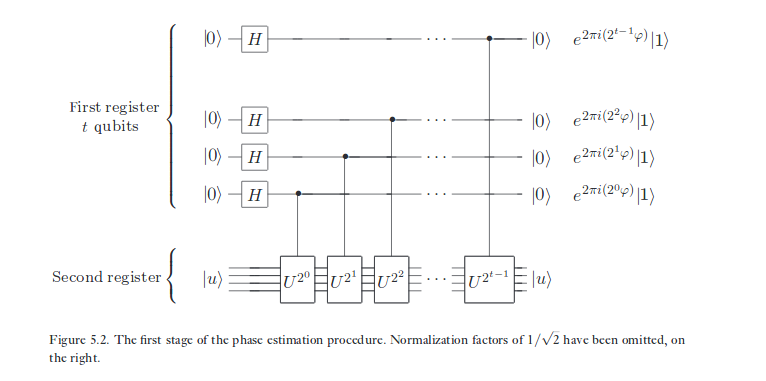



Veja que precisamos de várias versões do operador U.

Para t=3, por exemplo, precisaremos das portas $U = U^{2^0}$, $U.U = U^2$, $U.U.U = U^{3}$.

Após isso, podemos chamar a transformada de Fourier inversa nos $t$ qubits do primeiro registrador e teremos como leitura o estado da base $|\varphi>$.

Vamos ver como fica o circuito do exemplo que comentamos acima.

Se Z|1> = -1|1>, podemos estimar o autovalor do autovetor |u>=|1>, que é -1.

Se vamos estimar a fase no formato $e^{2 \pi i \varphi}$, então:
$-1 = e^{2 \pi i \varphi}$, para $\varphi = 1/2 = 0.5$.

Então, o valor da fase que queremos detectar é 0.5. 
Veja este "bizu": A fórmula para saber qual o estado da base que iremos ler para um dado ângulo $\varphi$, considerando $t$ de precisão, é $2^t \varphi$.

Por exemplo, se fixarmos $t=2$, para $\varphi = 0.5$, o estado da base que irá representá-lo na saída será $2^2 0.5 = 2$, ou seja, $|10>$ - se configurarmos $t=3$, para $\varphi = 0.5$, o estado da base que irá representá-lo na saída será $2^3 0.5 = 4$, ou seja, $|100>$.


Considerando $t=2$, vamos precisar apenas de Z^{2^0}=Z e Z^{2^1} = I.
Nosso circuito então é:


/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:548: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


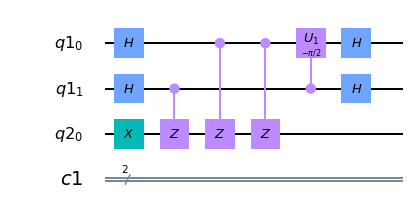

In [25]:
def create_superposition(circuito, qregister, t):
    for i in range(t):
        circuito.h(qregister[i])

#def aplicar_portas_U(circuito, qbits_t, qbits_phi, t, Us):
#    for i in range(t):
#        circuito.Us[i]()

IBMQ.backends()

backendSimulador = BasicAer.get_backend('qasm_simulator')


t = 2
num_of_qubits_input = 1

qbits_t = QuantumRegister(t)
qbits_phi = QuantumRegister(num_of_qubits_input)
cbits = ClassicalRegister(t)
circuit = QuantumCircuit(qbits_t, qbits_phi, cbits)

#cria a superposição dos t primeiros qubits do registrador de sáida
create_superposition(circuit, qbits_t, t)

#configura a entrada |phi> = |1>
circuit.x(qbits_phi[0])

#configura os controles
circuit.cz(qbits_t[1], qbits_phi)

circuit.cz(qbits_t[0], qbits_phi)
circuit.cz(qbits_t[0], qbits_phi)

#qft(circuit, qbits, num_of_qubits)
#qft_dagger(circuit, qbits, num_of_qubits)

qft_dagger(circuit, qbits_t, t)

#circuit_drawer(circuit)
circuit.draw(output="mpl")


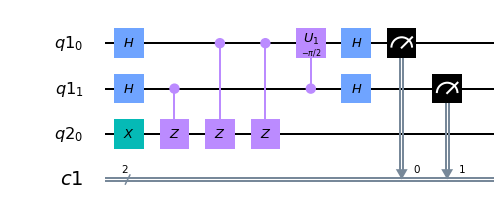

In [26]:
circuit.measure(qbits_t[0], cbits[0])
circuit.measure(qbits_t[1], cbits[1])

circuit.draw(output="mpl")

Executando o circuito no simulador quântico da IBM, podemos ver que o resultado |10> é como o esperado.

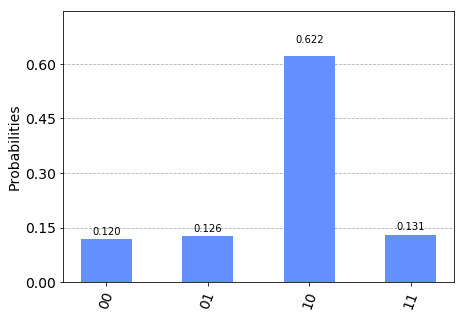

In [27]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

No processo de recuperação da fase, o valor de $t$ irá determinar quantos ângulos conseguimos detectar.

Para um dado $t$, podemos detectar $2^t$ ângulos diferentes.

Por exemplo, t=2, $2^2 = 4$ ângulos.

$\theta = 0, |00>$

$\theta = 1/4, |01>$

$\theta = 2/4, |10>$

$\theta = 3/4, |11>$

Por exemplo, t=3, $2^3 = 8$ ângulos.

$\theta = 0, |000>$

$\theta = 1/8, |001>$

$\theta = 2/8, |010>$

$\theta = 3/8, |011>$

$\theta = 4/8, |100>$

$\theta = 5/8, |101>$

$\theta = 6/8, |110>$

$\theta = 7/8, |111>$.

E assim sucessivamente... 


_O algoritmo quântico de Fourier é usado também em um algoritmo quântico bastante conhecido, o algoritmo de Shor - um algoritmo de fatoração em tempo polinomial._

_Mas isso a gente discute em outro tutorial. Se tiver dúvidas, críticas, sugestões, me manda um e-mail fernando@cin.ufpe.br_